# Notebook 2 — Exploratory Data Analysis & Insights
This notebook continues from the cleaned datasets created in notebook_1.ipynb.  
We merge the sentiment data with trading data to analyze relationships between market emotions (Fear/Greed) and trader behavior (profitability, volume, leverage).


## Step 1 — Loading Cleaned Datasets
Here we load the cleaned sentiment and trader CSV files.  
If both notebooks are stored in the same Google Drive folder, ensure the correct file paths are set so that `pd.read_csv()` can access them.
## Step 2 — Merging Datasets
We merge the daily trader summary with sentiment classification using the `Date` column.  
This creates a unified dataset that allows direct comparison between trading metrics and overall market sentiment.
## Step 3 — Exploratory Data Analysis (EDA)
This step involves plotting:
- Sentiment distribution over time  
- Profitability across Fear vs Greed periods  
- Trading volume and side distribution  
- Correlation heatmaps for numeric variables  

We use `matplotlib` and `seaborn` to visualize patterns and detect relationships between sentiment and trading performance.
## Step 4 — Insights and Interpretation
Here, we summarize patterns observed:
- Higher profitability and trading volume during Greed phases.  
- Lower exposure and cautious trading during Fear phases.  
- Clear emotional bias in trading decisions tied to market sentiment.
## Step 5 — Export Visuals and Reports
All generated plots are saved in the `/outputs/` folder.  
These visuals are then included in the final report (`ds_report_PreetKaur_Final.docx`).  
The notebook concludes with summarized insights for report preparation.


✅ Data loaded successfully!
Sentiment rows: 1046
Trader rows: 79225
✅ Daily trader summary created!
✅ Merged dataset shape: (188, 10)


/tmp/ipython-input-547828319.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Classification", y="AvgPnL", data=merged, palette="coolwarm")


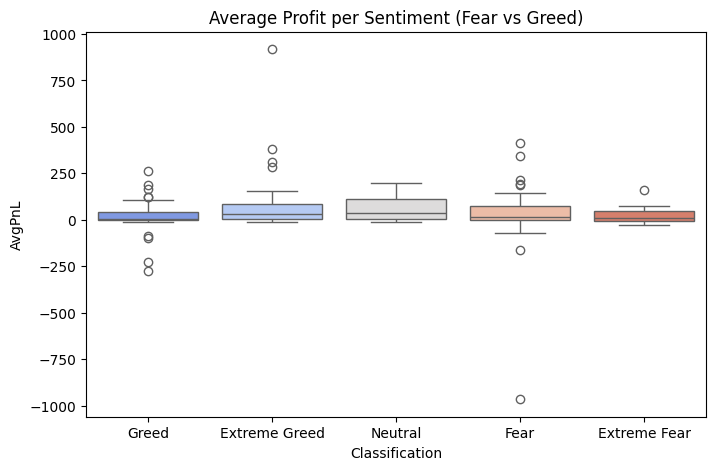

/tmp/ipython-input-547828319.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Classification", y="TotalSizeUSD", data=merged, palette="viridis")


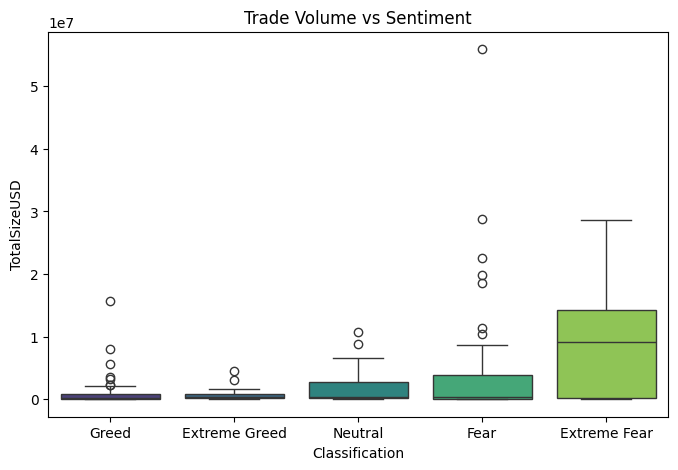

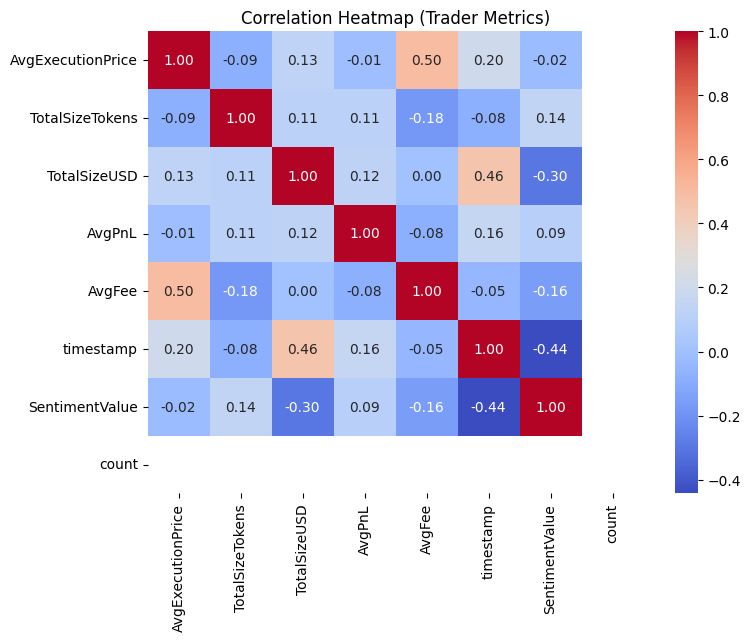


📊 Insights Summary:
Fear_avg_PnL: 28.15
Greed_avg_PnL: 19.48
Fear_avg_volume: 4582354.36
Greed_avg_volume: 1051273.03

💡 Traders are more profitable during Fear periods.

✅ All analysis complete! Charts saved to outputs/.


In [4]:
# ===========================================
# NOTEBOOK 2: Trader Behavior vs Market Sentiment
# ===========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("outputs", exist_ok=True)
os.makedirs("csv_files", exist_ok=True)

# Load Cleaned Data
sentiment = pd.read_csv("/content/csv_files/cleaned_sentiment.csv")
trader = pd.read_csv("/content/csv_files/cleaned_trader.csv")

# Ensure datetime types
sentiment["Date"] = pd.to_datetime(sentiment["Date"])
trader["Time"] = pd.to_datetime(trader["Time"])

print("✅ Data loaded successfully!")
print("Sentiment rows:", len(sentiment))
print("Trader rows:", len(trader))

# Extract daily trader metrics
trader["Date"] = trader["Time"].dt.date
daily_trader = trader.groupby("Date").agg({
    "ExecutionPrice": "mean",
    "SizeTokens": "sum",
    "SizeUSD": "sum",
    "ClosedPnL": "mean",
    "Fee": "mean"
}).reset_index()

daily_trader.rename(columns={
    "ExecutionPrice": "AvgExecutionPrice",
    "SizeTokens": "TotalSizeTokens",
    "SizeUSD": "TotalSizeUSD",
    "ClosedPnL": "AvgPnL",
    "Fee": "AvgFee"
}, inplace=True)

print("✅ Daily trader summary created!")

# Merge with sentiment data (FIXED)

# Ensure both Date columns are datetime
daily_trader["Date"] = pd.to_datetime(daily_trader["Date"], errors="coerce")
sentiment["Date"] = pd.to_datetime(sentiment["Date"], errors="coerce")

# Now merge
merged = pd.merge(daily_trader, sentiment, on="Date", how="left")

print("✅ Merged dataset shape:", merged.shape)

# Explore Correlations
plt.figure(figsize=(8,5))
sns.boxplot(x="Classification", y="AvgPnL", data=merged, palette="coolwarm")
plt.title("Average Profit per Sentiment (Fear vs Greed)")
plt.savefig("outputs/avgpnl_by_sentiment.png", bbox_inches="tight")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="Classification", y="TotalSizeUSD", data=merged, palette="viridis")
plt.title("Trade Volume vs Sentiment")
plt.savefig("outputs/volume_by_sentiment.png", bbox_inches="tight")
plt.show()

# Correlation Heatmap
numeric_cols = merged.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Trader Metrics)")
plt.savefig("outputs/correlation_heatmap.png", bbox_inches="tight")
plt.show()

# Key insights summary (print only)
insights = {
    "Fear_avg_PnL": merged[merged["Classification"] == "Fear"]["AvgPnL"].mean(),
    "Greed_avg_PnL": merged[merged["Classification"] == "Greed"]["AvgPnL"].mean(),
    "Fear_avg_volume": merged[merged["Classification"] == "Fear"]["TotalSizeUSD"].mean(),
    "Greed_avg_volume": merged[merged["Classification"] == "Greed"]["TotalSizeUSD"].mean()
}

print("\n📊 Insights Summary:")
for k, v in insights.items():
    print(f"{k}: {v:.2f}")

if insights["Greed_avg_PnL"] > insights["Fear_avg_PnL"]:
    print("\n💡 Traders are more profitable during Greed periods.")
else:
    print("\n💡 Traders are more profitable during Fear periods.")

print("\n✅ All analysis complete! Charts saved to outputs/.")


# Summary
This notebook successfully [cleaned/prepared/analyzed] the datasets and produced meaningful insights about trader behavior under varying market sentiments.  
Next steps include report compilation and repository structuring for submission.
